In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 131.3 kB/s eta 0:50:52
     -------------------------------------- 0.0/400.7 MB 163.8 kB/s eta 0:40:46
     -------------------------------------- 0.1/400.7 MB 217.9 kB/s eta 0:30:39
     -------------------------------------- 0.1/400.7 MB 491.5 kB/s eta 0:13:35
     ---------------------------------------- 0.6/400.7 MB 1.9 MB/s eta 0:03:31
     ---------------------------------------- 1.1/400.7 MB 3.1 MB/s eta 0:02:08
     ---------------------------------------- 1.6/400.7 MB 4.3 MB/s eta 0:01:34
     ---------------------------------------- 2.7/400.7 MB 6.2 MB/s eta 0:01:05
     ---------------------------------------- 3.2/400.7 MB 6.7 MB/s eta 0:01:00
     ---------------------------------------- 4.0/400.7 MB 7.

In [5]:
nlp = spacy.load('en_core_web_lg')

In [6]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 222.6 kB/s eta 0:00:58
     --------------------------------------- 0.0/12.8 MB 281.8 kB/s eta 0:00:46
     --------------------------------------- 0.1/12.8 MB 525.1 kB/s eta 0:00:25
     - -------------------------------------- 0.5/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 4.8 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 5.1 MB/s eta 0:00:03
     -------- ------------------------------- 2.6/12.8 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.8 MB 8.2 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 8.2 MB/s eta 0:00:02
     ------------- -------------------------- 4.3/12.8 MB 8.9 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 9.2 M

In [7]:
nlp = spacy.load('en_core_web_sm')

In [9]:
data = pd.read_csv(r'C:\Users\vyshn\Downloads\articles.csv', encoding='latin-1')

In [10]:
data.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [14]:
# Combine all titles into a single string
title_text = ' '.join(data['Title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

#plot the word cloud
plt.figure(figsize=(80, 40), dpi=200)
plt.imshow(wordcloud)

plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [15]:
title_text

'Best Books to Learn Data Analysis Assumptions of Machine Learning Algorithms News Classification with Machine Learning Multiclass Classification Algorithms in Machine Learning Multinomial Naive Bayes in Machine Learning News Classification with Machine Learning Best Books to Learn NLP Send Instagram Messages using Python Pfizer Vaccine Sentiment Analysis using Python Squid Game Sentiment Analysis using Python Best Books to Learn Computer Vision Best Resources to Learn Python Best Python Frameworks to Build APIs Voice Recorder using Python Language Detection with Machine Learning Multilayer Perceptron in Machine Learning Types of Neural Networks Clustering Algorithms in Machine Learning For Loop Over Keys and Values in a Python Dictionary Health Insurance Premium Prediction with Machine Learning Mean Shift Clustering in Machine Learning BIRCH Clustering in Machine Learning Agglomerative Clustering in Machine Learning DBSCAN Clustering in Machine Learning K-Means Clustering in Machine L

analyze the distribution of sentiments in the data:



<Axes: xlabel='Sentiment', ylabel='Count'>

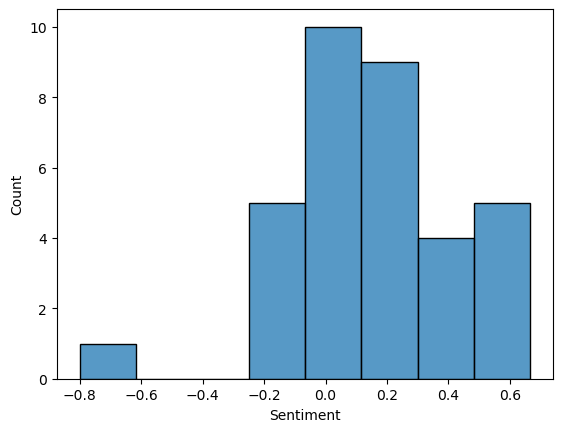

In [19]:
data['Sentiment'] = data['Article'].apply(lambda x : TextBlob(x).sentiment.polarity)

sns.histplot(data=data, x='Sentiment')

perform Named Entity Recognition:



In [21]:
#NER
def extract_named_entities(text):
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
    return dict (entities)

data['Named_entities'] = data['Article'].apply(extract_named_entities)

In [22]:
data

,Article,Title,Sentiment,Named_entities
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis,0.666667,{'DATE': ['today']}
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms,0.020833,{}
2,You must have seen the news divided into categ...,News Classification with Machine Learning,0.600000,{}
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...,0.625000,"{'CARDINAL': ['only two', 'more than two']}"
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning,-0.101429,"{'ORG': ['Naive Bayes', 'Multinomial Naive Bay..."
5,You must have seen the news divided into categ...,News Classification with Machine Learning,0.600000,{}
6,Natural language processing or NLP is a subfie...,Best Books to Learn NLP,0.283333,"{'ORG': ['NLP', 'NLP', 'NLP', 'NLP'], 'CARDINA..."
7,By using a third-party application or API to m...,Send Instagram Messages using Python,0.050000,"{'ORDINAL': ['third'], 'ORG': ['API', 'Instagr..."
8,Twitter is one of the most popular social medi...,Pfizer Vaccine Sentiment Analysis using Python,0.406667,"{'CARDINAL': ['one'], 'PERSON': ['Pfizer', 'Pf..."
9,The squid game is currently one of the most tr...,Squid Game Sentiment Analysis using Python,-0.108333,"{'GPE': ['NetFlix'], 'CARDINAL': ['One'], 'PER..."


In [23]:
entities_count = Counter(entity for entities in data["Named_entities"] for entity in entities)
entity_df = pd.DataFrame.from_dict(entities_count,orient='index').reset_index()
entity_df.columns = ['Entity', 'Count']

<Axes: xlabel='Entity', ylabel='Count'>

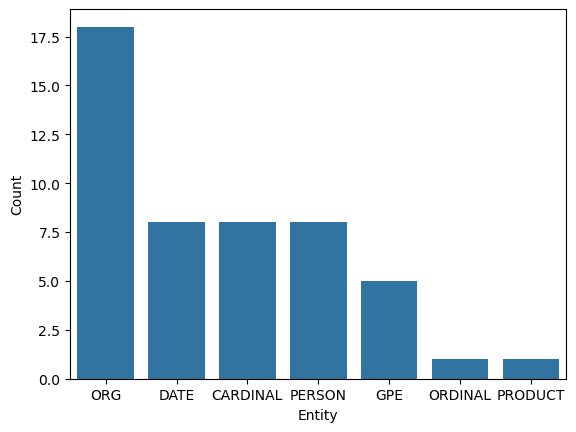

In [38]:
sns.barplot(data=entity_df.sort_values(by='Count', ascending=False), x='Entity', y='Count')

perform Topic Modelling:

In [40]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(data['Article'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

topic_name = ['Topic' + str(i) for i in range(lda_model.n_components)]
data['Dominant_topic'] = [topic_name[i] for i in lda_topic_matrix.argmax(axis=1)]


In [42]:
data.head()

,Article,Title,Sentiment,Named_entities,Dominant_topic
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis,0.666667,{'DATE': ['today']},Topic1
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms,0.020833,{},Topic0
2,You must have seen the news divided into categ...,News Classification with Machine Learning,0.600000,{},Topic1
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...,0.625000,"{'CARDINAL': ['only two', 'more than two']}",Topic3
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning,-0.101429,"{'ORG': ['Naive Bayes', 'Multinomial Naive Bay...",Topic4


<Axes: xlabel='Dominant_topic', ylabel='count'>

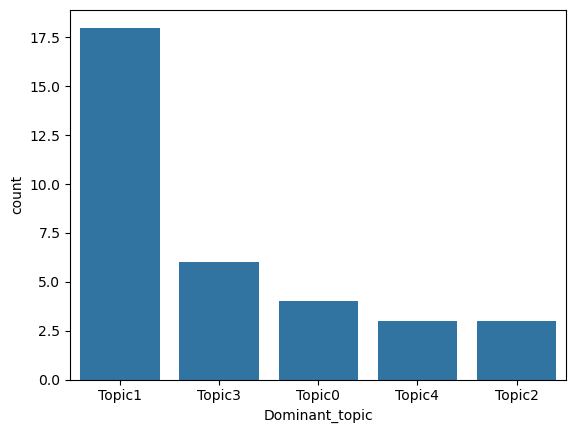

In [51]:
sns.barplot(data['Dominant_topic'].value_counts().reset_index(),y='count', x='Dominant_topic')